# Reddit Comments Prediction

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data=pd.read_csv('data.csv')

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data

,Unnamed: 0,gilded,author_flair_css_class,id,link_id,downs,subreddit,author,score,subreddit_id,...,body,retrieved_on,parent_id,controversiality,name,score_hidden,distinguished,archived,created_utc,removal_reason
0,0,0,NaN,2,t3_7j6z5,0,politics,malcontent,1,t5_2cneq,...,&gt;The business cannot survive paying out ben...,1428217153,t1_c06vdmu,0,t1_2,False,NaN,True,1229580037,NaN
1,1,0,NaN,3,t3_7jlvw,0,politics,malcontent,1,t5_2cneq,...,"&gt;I'm curious, how do you see, beyond defini...",1428217153,t1_c06vcxp,0,t1_3,False,NaN,True,1229580041,NaN
2,2,0,NaN,4,t3_7jlvw,0,politics,malcontent,2,t5_2cneq,...,"&gt;I'm curious, how do you see, beyond defini...",1428217153,t1_c06vcxp,0,t1_4,False,NaN,True,1229580053,NaN
3,3,0,NaN,5,t3_7k65l,0,WTF,[deleted],1,t5_2qh61,...,[deleted],1428217153,t1_c06vuga,0,t1_5,False,NaN,True,1229580067,NaN
4,4,0,NaN,6,t3_7k97q,0,reddit.com,[deleted],1,t5_6,...,[deleted],1428217153,t3_7k97q,0,t1_6,False,NaN,True,1229580072,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850354,850354,0,NaN,c06vwuf,t3_7k8lt,0,Music,[deleted],12,t5_2qh1u,...,"Yeah, seriously. If anything it ""revalues"" mus...",1428247742,t1_c06vwmo,0,t1_c06vwuf,False,NaN,True,1229579675,NaN
850355,850355,0,NaN,c06vwug,t3_7k3w5,0,comics,Morgin_Black,0,t5_2qh0s,...,"yes, beat it at failing.",1428247742,t3_7k3w5,0,t1_c06vwug,False,NaN,True,1229579679,NaN
850356,850356,0,NaN,c06vwuh,t3_7k31f,0,Economics,[deleted],1,t5_2qh1s,...,Yes. This DRM will have the ability to send s...,1428247742,t1_c06vhkx,0,t1_c06vwuh,False,NaN,True,1229579680,NaN
850357,850357,0,NaN,c06vwui,t3_7k2bc,0,atheism,onezerozeroone,1,t5_2qh2p,...,"To be fair, I think the original poster meant ...",1428247742,t1_c06vrvz,0,t1_c06vwui,False,NaN,True,1229579685,NaN


In [53]:
data['removal_reason'].value_counts()

Series([], Name: removal_reason, dtype: int64)

### columns that are irrelevant 
author_flair_css_class <br>
id <br>
link_id <br>
author <br>
subreddit_id <br>
body <br>
parent_id <br>
name <br>
Unnamed: 0
<br><br> <b>We will remove the above columns and use the remaining ones. </b>

In [325]:
remaining=data.drop(columns=['author_flair_css_class','id','link_id','author','subreddit_id','body','parent_id','name','Unnamed: 0'])

In [326]:
remaining

,gilded,downs,subreddit,score,ups,edited,author_flair_text,retrieved_on,controversiality,score_hidden,distinguished,archived,created_utc,removal_reason
0,0,0,politics,1,1,0,NaN,1428217153,0,False,NaN,True,1229580037,NaN
1,0,0,politics,1,1,0,NaN,1428217153,0,False,NaN,True,1229580041,NaN
2,0,0,politics,2,2,0,NaN,1428217153,0,False,NaN,True,1229580053,NaN
3,0,0,WTF,1,1,0,NaN,1428217153,0,False,NaN,True,1229580067,NaN
4,0,0,reddit.com,1,1,0,NaN,1428217153,0,False,NaN,True,1229580072,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850354,0,0,Music,12,12,0,NaN,1428247742,0,False,NaN,True,1229579675,NaN
850355,0,0,comics,0,0,0,NaN,1428247742,0,False,NaN,True,1229579679,NaN
850356,0,0,Economics,1,1,0,NaN,1428247742,0,False,NaN,True,1229579680,NaN
850357,0,0,atheism,1,1,0,NaN,1428247742,0,False,NaN,True,1229579685,NaN


# Preprocessing

<b> In preprocessing, we will perform many cleaning steps. </b>


In [327]:
remaining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850359 entries, 0 to 850358
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   gilded             850359 non-null  int64  
 1   downs              850359 non-null  int64  
 2   subreddit          850359 non-null  object 
 3   score              850359 non-null  int64  
 4   ups                850359 non-null  int64  
 5   edited             850359 non-null  int64  
 6   author_flair_text  3916 non-null    object 
 7   retrieved_on       850359 non-null  int64  
 8   controversiality   850359 non-null  int64  
 9   score_hidden       850359 non-null  bool   
 10  distinguished      2 non-null       object 
 11  archived           850359 non-null  bool   
 12  created_utc        850359 non-null  int64  
 13  removal_reason     0 non-null       float64
dtypes: bool(2), float64(1), int64(8), object(3)
memory usage: 79.5+ MB


### Observations:
1. Feature 'removal_reason' is all null. So it can be removed. <br>
2. Feature 'distinguished' has only two non-null. So it can be removed <br>
3. Feature 'retrieved_on' is actually a datetime column. So I will keep it on hold and check whether in its absence, my model works well or not.



In [328]:
remaining=remaining.drop(columns=['removal_reason','distinguished','retrieved_on'])

In [329]:
remaining['gilded'].value_counts()


0    850359
Name: gilded, dtype: int64

4. Feature 'gilded' is all 0. There is no next number. So it can be removed from the column. It is of no use.<br>
5. Feature 'downs' is all 0. There is no next number. So it can be removed from the column. It is of no use.<br>
6. Feature 'controversiality' has only one value 1 and others 0. It is also like an outlier. So it is also of no use.<br>
7. Feature 'score_hidden' has all values False. So it can be removed from the column. It is of no use

In [330]:
remaining=remaining.drop(columns=['gilded','downs','controversiality','score_hidden'])

In [331]:
remaining

,subreddit,score,ups,edited,author_flair_text,archived,created_utc
0,politics,1,1,0,NaN,True,1229580037
1,politics,1,1,0,NaN,True,1229580041
2,politics,2,2,0,NaN,True,1229580053
3,WTF,1,1,0,NaN,True,1229580067
4,reddit.com,1,1,0,NaN,True,1229580072
...,...,...,...,...,...,...,...
850354,Music,12,12,0,NaN,True,1229579675
850355,comics,0,0,0,NaN,True,1229579679
850356,Economics,1,1,0,NaN,True,1229579680
850357,atheism,1,1,0,NaN,True,1229579685


In [332]:
remaining['created_utc'].value_counts()

1229711368    6
1229983148    6
1230347295    6
1228535810    6
1228849384    6
             ..
1228437067    1
1230530121    1
1228549661    1
1229111747    1
1229981697    1
Name: created_utc, Length: 714831, dtype: int64

In [333]:
x=remaining.drop(columns='score',axis=1)
y=remaining['score']

In [334]:
print(x['author_flair_text'].isna().sum()/x['author_flair_text'].shape[0]*100)

99.53948861598454


8. It seems that 99% of the data is missing. So there is no use of this column as well. Let's remove it<br>
9. Since created_utc is a datetime column, it doesnt hold any importance.<br>
10. The ups column is our target's copy. I will remove it.

In [335]:
x=x.drop(columns=['author_flair_text','created_utc','ups'])

In [336]:
x['archived']=x['archived'].astype('int')

In [337]:
'''from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
x['subreddit']=lb.fit_transform(x['subreddit'])'''

"from sklearn.preprocessing import LabelBinarizer\nlb=LabelBinarizer()\nx['subreddit']=lb.fit_transform(x['subreddit'])"

In [338]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
oh=OneHotEncoder()


In [339]:
q=x['subreddit']

In [340]:
q=le.fit_transform(q)

In [341]:
x['subreddit']=q

In [342]:
x

,subreddit,edited,archived
0,885,0,1
1,885,0,1
2,885,0,1
3,415,0,1
4,912,0,1
...,...,...,...
850354,276,0,1
850355,557,0,1
850356,142,0,1
850357,477,0,1


In [343]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=pd.DataFrame(data=ss.fit_transform(x),columns=list(x))

In [344]:
x

,subreddit,edited,archived
0,0.588701,-0.028097,0.011166
1,0.588701,-0.028097,0.011166
2,0.588701,-0.028097,0.011166
3,-0.981827,-0.028097,0.011166
4,0.678923,-0.028097,0.011166
...,...,...,...
850354,-1.446303,-0.028097,0.011166
850355,-0.507327,-0.028097,0.011166
850356,-1.894070,-0.028097,0.011166
850357,-0.774651,-0.028097,0.011166


<b>The above used features are:</b><br>
    1. subreddit= It is the category of subreddit. <br>
    2. edited= Boolean value whether or not the comment is edited. <br>
    3. archived= Boolean value whether or not the comment is archived.

# Modeling Part

In [345]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.3,random_state=0)

In [346]:
print(xtr.shape,ytr.shape,xte.shape,yte.shape)

(595251, 3) (595251,) (255108, 3) (255108,)


In [354]:
'''from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(xtr,ytr)'''

import xgboost
from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(xtr,ytr)
y_pred=xgbr.predict(xte)

In [348]:
y_pred=rfr.predict(xte)

In [355]:
from sklearn.metrics import mean_squared_error,r2_score
print(np.sqrt(mean_squared_error(yte,y_pred)))
print(r2_score(yte,y_pred))

13.01310786682185
0.005082259925094257


In [357]:
comparable=pd.DataFrame()
comparable['Actual']=yte
comparable['Predicted']=y_pred

In [358]:
comparable

,Actual,Predicted
650722,1,2.949873
660177,1,3.832921
681903,1,4.901563
844045,1,5.598440
329257,0,2.931967
...,...,...
29895,-2,4.748488
162569,1,5.214175
329747,0,4.424610
292944,8,2.972241


## This has given me a very horrible result so far.

In [360]:
import tensorflow as tf
from tensorflow import keras


In [365]:
xtr.shape

(595251, 3)

In [363]:
xtr.shape[0]*xtr.shape[1]

1785753

In [368]:
model=keras.models.Sequential()
model.add(keras.layers.Input(shape=(3,)))
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(1))

In [369]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [387]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics='accuracy')

In [388]:
hist=model.fit(xtr,ytr,batch_size=32,epochs=10,validation_split=0.3)

Epoch 1/10
13022/13022 [==============================] - 23s 2ms/step - loss: 158.6613 - accuracy: 0.4174 - val_loss: 153.3440 - val_accuracy: 0.4177
Epoch 2/10
13022/13022 [==============================] - 21s 2ms/step - loss: 169.5123 - accuracy: 0.4178 - val_loss: 153.3114 - val_accuracy: 0.4177
Epoch 3/10
13022/13022 [==============================] - 20s 2ms/step - loss: 163.2281 - accuracy: 0.4178 - val_loss: 153.2940 - val_accuracy: 0.4177
Epoch 4/10
13022/13022 [==============================] - 23s 2ms/step - loss: 174.0953 - accuracy: 0.4179 - val_loss: 153.3002 - val_accuracy: 0.4177
Epoch 5/10
13022/13022 [==============================] - 22s 2ms/step - loss: 197.3745 - accuracy: 0.4170 - val_loss: 153.3100 - val_accuracy: 0.4177
Epoch 6/10
13022/13022 [==============================] - 22s 2ms/step - loss: 161.0111 - accuracy: 0.4172 - val_loss: 153.3069 - val_accuracy: 0.4177
Epoch 7/10
13022/13022 [==============================] - 23s 2ms/step - loss: 179.4840 - accu

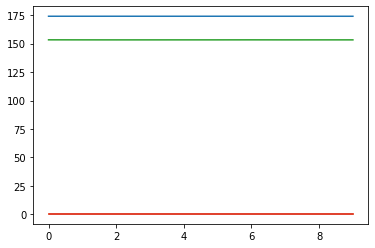

In [389]:
plt.plot(pd.DataFrame(hist.history))

In [373]:
print('RMSE I got is ',np.sqrt(153))

RMSE I got is  12.36931687685298


In [374]:
y_pred=model.predict(xte)

In [376]:
com=pd.DataFrame()
com['Actual']=yte
com['Predicted']=y_pred

In [377]:
com

,Actual,Predicted
650722,1,3.244673
660177,1,3.074979
681903,1,3.332602
844045,1,3.636803
329257,0,3.314207
...,...,...
29895,-2,3.074979
162569,1,3.805642
329747,0,3.636803
292944,8,3.473413


In [384]:
from sklearn.metrics import r2_score
print('r2 score is ',r2_score(yte,y_pred))

r2 score is  -2.8911692215638496e-05
